We will now train a decision tree and a simple neural network, a multi-layer perceptron, to classify handwritten digits in the MNIST dataset

Below we load our libraries we'll be using and download the MNIST dataset

In [1]:
# Read in the mnist digit dataset

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import random
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Next, we will divide the data into a training set and test set, randomly selecting 5000 examples for training

In [8]:
train_samples = 5000

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=1000)

Let's print out the 417$^{\text{th}}$ item in the dataset and its label

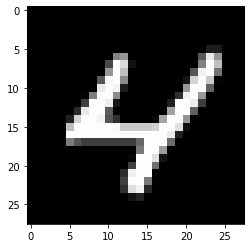

'4'

In [9]:
i = 417
img = np.array(X_train[i]).reshape(28,28)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
y_train[i]

Let's see how a decision tree with 170 decision rules performs by training it and printing its accuracy

In [10]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 170)	
clf = clf.fit(X_train, y_train)			
correct = 0						
for i in range(len(X_test)):	
  if clf.predict([X_test[i]]) == y_test[i]: correct = correct + 1
  acc = [100.0* correct / len(X_test)]
acc

[75.5]

Now let's try a simple neural network, a multi-layer perceptron with no hidden layers

In [11]:
clf = MLPClassifier(hidden_layer_sizes=[], max_iter = 10000, activation = 'identity')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.859


Now, we will add one hidden layer and expand the number of hidden units from 10 to 200 in intervals of 10. We'll print the accuracy of each model given the number of hidden units.

In [12]:
for i in range(1,21):
  nhidden = i*10
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden, score)

10 0.561
20 0.851
30 0.85
40 0.865
50 0.857
60 0.867
70 0.863
80 0.886
90 0.878
100 0.894
110 0.904
120 0.898
130 0.895
140 0.903
150 0.9
160 0.886
170 0.889
180 0.912
190 0.906
200 0.911


To see how a model varies across multiple runes, we check it ten times.

In [13]:
nhidden = 170
for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 10000)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(nhidden,score)

170 0.891
170 0.905
170 0.919
170 0.91
170 0.924
170 0.897
170 0.916
170 0.902
170 0.91
170 0.91
